In [97]:
import pandas as pd
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score
from sklearn.multiclass import OneVsRestClassifier
import sklearn

In [2]:
train_url = "./Data/Train/train_data.csv"
test_url = "./Data/Test/test_data.csv"

train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

print(train_data.shape)
print(test_data.shape)
train_data.head()

(800000, 8)
(200000, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,5.572427,4.850337,1.149870,1.0,0.0,0.0,0.0,0.0
1,5.327530,3.933291,1.682739,1.0,1.0,0.0,1.0,0.0
2,78.945633,0.023222,2.740935,1.0,1.0,0.0,1.0,0.0
3,10.119026,26.548445,1.945075,1.0,0.0,0.0,0.0,0.0
4,33.646388,1.909240,0.888281,1.0,0.0,0.0,0.0,0.0


In [3]:
train_X, train_Y = train_data.drop("fraud", axis=1), train_data["fraud"]
test_X, test_Y = test_data.drop("fraud", axis=1), test_data["fraud"]
print("Train Data Shape", train_X.shape, train_Y.shape)
print(train_Y.value_counts())
print("Test Data Shape", test_X.shape, test_Y.shape)
print(test_Y.value_counts())
train_X.head()

Train Data Shape (800000, 7) (800000,)
0.0    730181
1.0     69819
Name: fraud, dtype: int64
Test Data Shape (200000, 7) (200000,)
0.0    182416
1.0     17584
Name: fraud, dtype: int64


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,5.572427,4.850337,1.149870,1.0,0.0,0.0,0.0
1,5.327530,3.933291,1.682739,1.0,1.0,0.0,1.0
2,78.945633,0.023222,2.740935,1.0,1.0,0.0,1.0
3,10.119026,26.548445,1.945075,1.0,0.0,0.0,0.0
4,33.646388,1.909240,0.888281,1.0,0.0,0.0,0.0


In [4]:
train_X.iloc[:4].shape

(4, 7)

In [57]:
scores = dict()
scores["Kernel"] = []
scores["C"] = []
scores["F1"] = []
scores["Accuracy"] = []

# Support Vector Machine Classifier

## SVM with Default Hyperparamteres

Dataset is too massive, sample first 100,000 rows of the dataset.

In [5]:
sample_size = 100000

In [6]:
# train default SVC
svc_default=svm.SVC()
svc_default.fit(train_X.iloc[:sample_size], train_Y.iloc[:sample_size])

SVC()

In [7]:
# predict on test set
y_pred_default = svc_default.predict(test_X.iloc[:sample_size])

In [8]:
# output default hyperparameter accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(test_Y.iloc[:sample_size], y_pred_default)))

Model accuracy score with default hyperparameters: 0.9300


In [9]:
# print confusion matrix
confusion_matrix(test_Y.iloc[:sample_size], y_pred_default)

array([[90388,   785],
       [ 6214,  2613]], dtype=int64)

In [59]:
f1_default = f1_score(test_Y.iloc[:sample_size], y_pred_default)
f1_default

0.42748466257668716

In [62]:
scores["Kernel"].append("RBF")
scores["C"].append("None")
scores["F1"].append(f1_default)
scores["Accuracy"].append(accuracy_score(test_Y.iloc[:sample_size], y_pred_default))

## SVM with C = 100, Higher C means fewer outliers

In [10]:
# train SVM with C = 100
svc_highC = SVC(C=100.0) 
svc_highC.fit(train_X.iloc[:sample_size], train_Y.iloc[:sample_size])

SVC(C=100.0)

In [11]:
# predict on test set
y_pred_highC = svc_highC.predict(test_X.iloc[:sample_size])

In [12]:
# output high C accuracy score
print('Model accuracy score with High C = 100 Value: {0:0.4f}'. format(accuracy_score(test_Y.iloc[:sample_size], y_pred_highC)))

Model accuracy score with High C = 100 Value: 0.9835


In [13]:
# print confusion matrix
confusion_matrix(test_Y.iloc[:sample_size], y_pred_highC)

array([[90863,   310],
       [ 1336,  7491]], dtype=int64)

In [60]:
f1_highC = f1_score(test_Y.iloc[:sample_size], y_pred_highC)
f1_highC

0.9010103439980754

In [63]:
scores["Kernel"].append("RBF")
scores["C"].append("100")
scores["F1"].append(f1_highC)
scores["Accuracy"].append(accuracy_score(test_Y.iloc[:sample_size], y_pred_highC))

## SVM with C = 1000, Higher C means fewer outliers

In [14]:
# train SVM with higher C = 1000
svc_higherC = SVC(C=1000.0)
svc_higherC.fit(train_X.iloc[:sample_size], train_Y.iloc[:sample_size])

SVC(C=1000.0)

In [15]:
# predict on test set
y_pred_higherC = svc_higherC.predict(test_X.iloc[:sample_size])

In [16]:
# output high C accuracy score
print('Model accuracy score with Higher C = 1000 Value: {0:0.4f}'. format(accuracy_score(test_Y.iloc[:sample_size], y_pred_higherC)))

Model accuracy score with Higher C = 1000 Value: 0.9901


In [17]:
# print confusion matrix
confusion_matrix(test_Y.iloc[:sample_size], y_pred_higherC)

array([[90934,   239],
       [  747,  8080]], dtype=int64)

In [64]:
f1_higherC = f1_score(test_Y.iloc[:sample_size], y_pred_higherC)
f1_higherC

0.942493876122711

In [65]:
scores["Kernel"].append("RBF")
scores["C"].append("1000")
scores["F1"].append(f1_higherC)
scores["Accuracy"].append(accuracy_score(test_Y.iloc[:sample_size], y_pred_higherC))

## SVM with linear kernel and C = 1.0

In [18]:
linear_C1 = svm.SVC(kernel='linear', C=1.0)
linear_C1.fit(train_X.iloc[:sample_size], train_Y.iloc[:sample_size])

SVC(kernel='linear')

In [19]:
y_pred_linear_C1 = linear_C1.predict(test_X.iloc[:sample_size])

In [20]:
# get accuracy
accuracy_score(test_Y.iloc[:sample_size], y_pred_linear_C1)

0.96031

In [21]:
confusion_matrix(test_Y.iloc[:sample_size], y_pred_linear_C1)

array([[90530,   643],
       [ 3326,  5501]], dtype=int64)

In [66]:
f1_linear_C1 = f1_score(test_Y.iloc[:sample_size], y_pred_linear_C1)
f1_linear_C1

0.7348874490681985

In [67]:
scores["Kernel"].append("Linear")
scores["C"].append("1")
scores["F1"].append(f1_linear_C1)
scores["Accuracy"].append(accuracy_score(test_Y.iloc[:sample_size], y_pred_linear_C1))

## SVM with linear kernel and C = 100.0

In [22]:
linear_C100 = svm.SVC(kernel='linear', C=100.0)
linear_C100.fit(train_X.iloc[:sample_size], train_Y.iloc[:sample_size])

SVC(C=100.0, kernel='linear')

In [23]:
y_pred_linear_C100 = linear_C100.predict(test_X.iloc[:sample_size])

In [24]:
# get accuracy
accuracy_score(test_Y.iloc[:sample_size], y_pred_linear_C100)

0.96495

In [25]:
confusion_matrix(test_Y.iloc[:sample_size], y_pred_linear_C100)

array([[90462,   711],
       [ 2794,  6033]], dtype=int64)

In [68]:
f1_linear_C100 = f1_score(test_Y.iloc[:sample_size], y_pred_linear_C100)
f1_linear_C100

0.774902061524629

In [69]:
scores["Kernel"].append("Linear")
scores["C"].append("100")
scores["F1"].append(f1_linear_C100)
scores["Accuracy"].append(accuracy_score(test_Y.iloc[:sample_size], y_pred_linear_C100))

## SVM with linear kernel and C = 1000.0

In [26]:
linear_C1000 = svm.SVC(kernel='linear', C=1000.0)
linear_C1000.fit(train_X.iloc[:sample_size], train_Y.iloc[:sample_size])

SVC(C=1000.0, kernel='linear')

In [27]:
y_pred_linear_C1000 = linear_C1000.predict(test_X.iloc[:sample_size])

In [28]:
# get accuracy
accuracy_score(test_Y.iloc[:sample_size], y_pred_linear_C1000)

0.96314

In [29]:
confusion_matrix(test_Y.iloc[:sample_size], y_pred_linear_C1000)

array([[90349,   824],
       [ 2862,  5965]], dtype=int64)

In [70]:
f1_linear_C1000 = f1_score(test_Y.iloc[:sample_size], y_pred_linear_C1000)
f1_linear_C1000

0.7639600409836066

In [71]:
scores["Kernel"].append("Linear")
scores["C"].append("1000")
scores["F1"].append(f1_linear_C1000)
scores["Accuracy"].append(accuracy_score(test_Y.iloc[:sample_size], y_pred_linear_C1000))

## SVM with polynomial kernel and C = 1.0

In [30]:
poly_C1 = svm.SVC(kernel='poly', C=1.0)
poly_C1.fit(train_X.iloc[:sample_size], train_Y.iloc[:sample_size])

SVC(kernel='poly')

In [31]:
y_pred_poly_C1 = poly_C1.predict(test_X.iloc[:sample_size])

In [32]:
# get accuracy
accuracy_score(test_Y.iloc[:sample_size], y_pred_poly_C1)

0.92563

In [33]:
confusion_matrix(test_Y.iloc[:sample_size], y_pred_poly_C1)

array([[91042,   131],
       [ 7306,  1521]], dtype=int64)

In [72]:
f1_poly_C1 = f1_score(test_Y.iloc[:sample_size], y_pred_poly_C1)
f1_poly_C1

0.29029487546521615

In [73]:
scores["Kernel"].append("Polynomial")
scores["C"].append("1")
scores["F1"].append(f1_poly_C1)
scores["Accuracy"].append(accuracy_score(test_Y.iloc[:sample_size], y_pred_poly_C1))

## SVM with polynomial kernel and C = 100.0

In [34]:
poly_C100 = svm.SVC(kernel='poly', C=100.0)
poly_C100.fit(train_X.iloc[:sample_size], train_Y.iloc[:sample_size])

SVC(C=100.0, kernel='poly')

In [35]:
y_pred_poly_C100 = poly_C100.predict(test_X.iloc[:sample_size])

In [36]:
# get accuracy
accuracy_score(test_Y.iloc[:sample_size], y_pred_poly_C100)

0.9087

In [37]:
confusion_matrix(test_Y.iloc[:sample_size], y_pred_poly_C100)

array([[87184,  3989],
       [ 5141,  3686]], dtype=int64)

In [74]:
f1_poly_C100 = f1_score(test_Y.iloc[:sample_size], y_pred_poly_C100)
f1_poly_C100

0.44673372924494

In [75]:
scores["Kernel"].append("Polynomial")
scores["C"].append("100")
scores["F1"].append(f1_poly_C100)
scores["Accuracy"].append(accuracy_score(test_Y.iloc[:sample_size], y_pred_poly_C100))

## SVM with polynomial kernel and C = 1000.0

In [38]:
poly_C1000 = svm.SVC(kernel='poly', C=1000.0)
poly_C1000.fit(train_X.iloc[:sample_size], train_Y.iloc[:sample_size])

SVC(C=1000.0, kernel='poly')

In [39]:
y_pred_poly_C1000 = poly_C1000.predict(test_X.iloc[:sample_size])

In [40]:
# get accuracy
accuracy_score(test_Y.iloc[:sample_size], y_pred_poly_C1000)

0.90172

In [41]:
confusion_matrix(test_Y.iloc[:sample_size], y_pred_poly_C1000)

array([[86331,  4842],
       [ 4986,  3841]], dtype=int64)

In [76]:
f1_poly_C1000 = f1_score(test_Y.iloc[:sample_size], y_pred_poly_C1000)
f1_poly_C1000

0.43872073101085096

In [77]:
scores["Kernel"].append("Polynomial")
scores["C"].append("1000")
scores["F1"].append(f1_poly_C1000)
scores["Accuracy"].append(accuracy_score(test_Y.iloc[:sample_size], y_pred_poly_C1000))

## SVM with sigmoid kernel and C = 1.0

In [42]:
sig_C1 = svm.SVC(kernel='sigmoid', C=1.0)
sig_C1.fit(train_X.iloc[:sample_size], train_Y.iloc[:sample_size])

SVC(kernel='sigmoid')

In [43]:
y_pred_sig_C1 = sig_C1.predict(test_X.iloc[:sample_size])

In [44]:
# get accuracy
accuracy_score(test_Y.iloc[:sample_size], y_pred_sig_C1)

0.84558

In [45]:
confusion_matrix(test_Y.iloc[:sample_size], y_pred_sig_C1)

array([[83686,  7487],
       [ 7955,   872]], dtype=int64)

In [80]:
f1_sig_C1 = f1_score(test_Y.iloc[:sample_size], y_pred_sig_C1)
f1_sig_C1

0.10147794716629815

In [81]:
scores["Kernel"].append("Sigmoid")
scores["C"].append("1")
scores["F1"].append(f1_sig_C1)
scores["Accuracy"].append(accuracy_score(test_Y.iloc[:sample_size], y_pred_sig_C1))

## SVM with sigmoid kernel and C = 100.0

In [46]:
sig_C100 = svm.SVC(kernel='sigmoid', C=100.0)
sig_C100.fit(train_X.iloc[:sample_size], train_Y.iloc[:sample_size])

SVC(C=100.0, kernel='sigmoid')

In [47]:
y_pred_sig_C100 = sig_C100.predict(test_X.iloc[:sample_size])

In [48]:
# get accuracy
accuracy_score(test_Y.iloc[:sample_size], y_pred_sig_C100)

0.84262

In [49]:
confusion_matrix(test_Y.iloc[:sample_size], y_pred_sig_C100)

array([[83384,  7789],
       [ 7949,   878]], dtype=int64)

In [82]:
f1_sig_C100 = f1_score(test_Y.iloc[:sample_size], y_pred_sig_C100)
f1_sig_C100

0.10037727220761404

In [83]:
scores["Kernel"].append("Sigmoid")
scores["C"].append("100")
scores["F1"].append(f1_sig_C100)
scores["Accuracy"].append(accuracy_score(test_Y.iloc[:sample_size], y_pred_sig_C100))

## SVM with sigmoid kernel and C = 1000.0

In [50]:
sig_C1000 = svm.SVC(kernel='sigmoid', C=1000.0)
sig_C1000.fit(train_X.iloc[:sample_size], train_Y.iloc[:sample_size])

SVC(C=1000.0, kernel='sigmoid')

In [51]:
y_pred_sig_C1000 = sig_C1000.predict(test_X.iloc[:sample_size])

In [52]:
# get accuracy
accuracy_score(test_Y.iloc[:sample_size], y_pred_sig_C1000)

0.84259

In [53]:
confusion_matrix(test_Y.iloc[:sample_size], y_pred_sig_C1000)

array([[83381,  7792],
       [ 7949,   878]], dtype=int64)

In [84]:
f1_sig_C1000 = f1_score(test_Y.iloc[:sample_size], y_pred_sig_C1000)
f1_sig_C1000

0.10036006172486711

In [85]:
scores["Kernel"].append("Sigmoid")
scores["C"].append("1000")
scores["F1"].append(f1_sig_C1000)
scores["Accuracy"].append(accuracy_score(test_Y.iloc[:sample_size], y_pred_sig_C1000))

## Show Results

In [86]:
pd.DataFrame.from_dict(scores)

,Kernel,C,F1,Accuracy
0,RBF,None,0.427485,0.93001
1,RBF,100,0.901010,0.98354
2,RBF,1000,0.942494,0.99014
3,Linear,1,0.734887,0.96031
4,Linear,100,0.774902,0.96495
5,Linear,1000,0.763960,0.96314
6,Polynomial,1,0.290295,0.92563
7,Polynomial,100,0.446734,0.90870
8,Polynomial,1000,0.438721,0.90172
9,Sigmoid,1,0.101478,0.84558


## Most Optimal Model: RBF Kernel with C = 1000 on Test Set

In [89]:
best_clf = svm.SVC(C=1000.0)
best_clf.fit(train_X.iloc[:sample_size], train_Y.iloc[:sample_size])
pred_Y = best_clf.predict(test_X.iloc[:sample_size])
print("Accuracy:", accuracy_score(test_Y.iloc[:sample_size], pred_Y))

Accuracy: 0.99014


In [98]:
c_matrix = sklearn.metrics.confusion_matrix(test_Y.iloc[:sample_size], pred_Y)

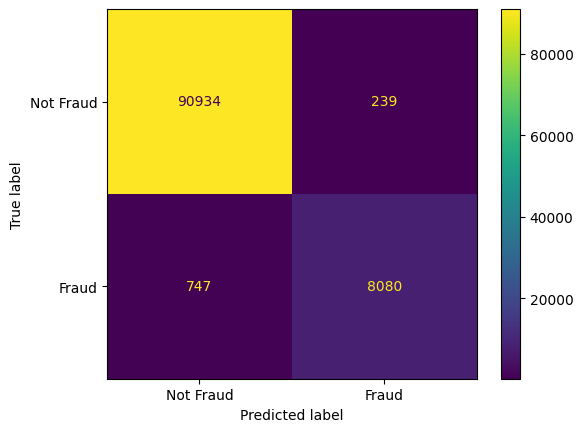

In [99]:
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=["Not Fraud", "Fraud"])
disp.plot()
#show confusion matrix with image and color

In [101]:
#show the f_1 score
f1 = f1_score(test_Y.iloc[:sample_size], pred_Y)
print("F_1 score: ", f1)

F_1 score:  0.942493876122711


## Prediction on Training set

In [102]:
pred_train_Y = best_clf.predict(train_X.iloc[:sample_size])
print("Accuracy:", accuracy_score(train_Y.iloc[:sample_size], pred_train_Y))

Accuracy: 0.99068


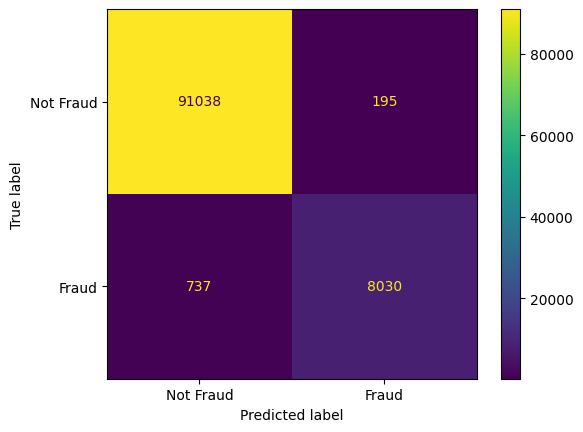

In [104]:
c_t_matrix = sklearn.metrics.confusion_matrix(train_Y.iloc[:sample_size], pred_train_Y)
disp = ConfusionMatrixDisplay(confusion_matrix=c_t_matrix, display_labels=["Not Fraud", "Fraud"])
disp.plot()

In [105]:
#show the f_1 score
f1_train = f1_score(train_Y.iloc[:sample_size], pred_train_Y)
print("F_1 train score: ", f1_train)

F_1 train score:  0.9451506591337101
